# $$Preliminary Data Analysis - - -Cardio Good Fitness $$


# Cardio Good Fitness

Cardio Good Fitness is a retail store. The dataset that is used for this case study is from the customers who use treadmills from this retail store. Our study specifically focuses on the threadmill products TM195, TM498 and TM798 .<br>
In order to gain an edge on the threadmill customer base and to help the store to get insights into different customer attributes and their impact on the sale of product, case study is done. The dataset has information of 180 customers of the three specified products and also 8 attributes of the customers.
    
### Objective -
Preliminary Data Analysis. <br>

### Key Questions -

1.Perform uni-variate and multi-variate analyses. <br>
2.Come up with a customer profile (characteristics of a customer)of the products - TM195, TM498 and TM798. <br>
3.Generate a set of insights and recommendations that will help the company in targeting new customers. <br>

## Variables-  
Product   - the model no. of the treadmill<br>
Age       - in no of years, of the customer<br>
Gender    - of the customer<br>
Education - in no. of years, of the customer<br>
Usage     - Avg. # times the customer wants to use the treadmill every week<br>
Fitness   - Self rated fitness score of the customer (5 - very fit, 1 - very unfit) <br>
Income    - of the customer<br>
Miles     - expected to run<br>
Marital Status - of the customer<br>


### Note:
We choose to perform the analysis by asking vital questions that guide us to explore and better understand the customer profile for each treadmill product.


# Importing the necessary libraries to the python

In [1]:
#mport the necessary libraries - pandas, numpy, seaborn, matplotlib.pyplot
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
# for nice background to the graphs
sns.set(color_codes = True)


In [2]:
#suppress warnings in the IPython Notebook
import warnings
warnings.simplefilter('ignore')

# Understanding the structure of the data

## Loading the dataset 

In [49]:
# reading the csv file.
df = pd.read_csv('CardioGoodFitness.csv')

In [4]:
# copying data to varaible 'data' to avoid changes to original data
data= df.copy()

## Viewing the first few and last few rows of the dataset

In [5]:
## retrieving data of the  first 5 rows 
data.head() 

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [6]:
# retrieving data of the last 5 rows 
data.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180




#### Observations¶
The data looks clean and the all the variables(columns) match the description provided in the data dictionary.<br>
Product contains the types of threadmill.<br>
Age contains age of customer.<br>
Gender and marital status are categorical variables.<br>
Education is provided as in number of years of education.<br>
Usage, Income and Miles are numerical variables.<br>
Fitness ratings of customers are ranging from 1 to 5.<br>


## Checking the shape of the dataset

In [7]:
# retrieving the shape of the dataset

data.shape#shows the shape, i.e the number of rows and columns of the dataset

(180, 9)

### Observations
There are 180 observations/rows and 9 attributes/columns.

## Checking the Column names of the dataset

In [8]:
data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

#### Observations
There are 7 columns.


## Check the datatypes of the variables

In [9]:
#cheking the datatypes to make sure they are in the correct type.
data.info() # Outputs general information about the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### Observations 
There are no null values observed.<br>
The variables Product,Gender and MaritalStatus are string but could be changed to categorical.<br>

# Data Preprocessing

## Fixing the datatypes

In [10]:
#changing the datatypes of the columns as required.
data['Product'] = data.Product.astype('category')#converting the object datatype to category-for Product
data['Gender'] = data.Gender.astype('category')#converting the object datatype to category-for Gender
data['MaritalStatus'] = data.MaritalStatus.astype('category')#converting the object datatype to category-for MaritalStatus

## Rechecking the datatypes

In [11]:
data.info() # checking the datatypes to see if the changes are observed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.4 KB


### Observations
When we compare the information of this with the earlier datatype information, we can see that the MaritalStatus, Product, and gender datatypes are converted to category datatype<br>
The memory usage is also reduced from 12.8MB to 9.4MB.<br

## Checking the dataset for null and duplicate values

In [12]:
#duplicated rows presence 
data.duplicated().sum()# returns the sum of all the duplicate rows if they exist


0

In [13]:
#presence of null values
data.isnull().any()#returns true if there are null values or else false

Product          False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool

#### Observations 
There are no null values in the data.<br>
There are no duplicate rows in the data set.

## Analysing the variables of the dataset

In [14]:
data.describe(include='all')# basic statistical summary of each column is calculated

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


#### Observations 

There is no Null data.

1. There are 3 unique Products, looks like product TM195 is most frequently used.
2. The customers ages are ranging from 18years to 50 years.
3. The Income data and Miles may have many outliers, this is based on the fact that both the IQR value and  3rd qartile value are much lower than the maximum value.
4. The data for each of the column is at a different scale.

# Exploratory Data Analysis

### Univariate Analysis

###  Starting with Categorical variables analysis

## Which Product is sold most? What is the count of each product sold?
Visualization and observation on - Product -using the countplot

In [15]:
#Calculating percentage for each model sold
def product(num):
    model = data.Product.unique()[num]
    per = round((data.Product.value_counts()[num]/ data.Product.value_counts().sum())*100)#calculating the percentage
    return (model+'-'+(str(per)+'%'))#returns the percentage

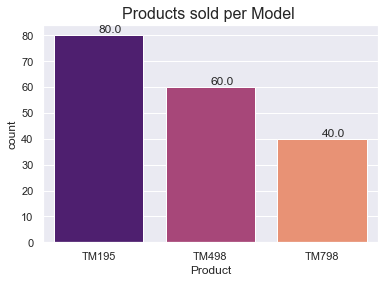

('TM195-44%', 'TM498-33%', 'TM798-22%')

In [16]:
#Code for plotting the categorical variable 'Product' using countplot.
ax=sns.countplot(data.Product,palette='magma');# plotting a countplot for the Product
ax.set_title('Products sold per Model ',fontsize=16,)#setting a title 
#printing count on top of bar
for p in ax.patches: ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+1), size=12)
plt.show()        
product(0),product(1),product(2)# Calling the function product() to gives count in % 

### Observations

From the count plot,we can observe there are 180 products were sold. Out of them 80 are TM195,60 are TM498 and 40 are TM798.<br>
The product TM195 is most sold with 44% of toatal sales,followed by TM489 with 33% of roral sales,and at last place is TM798 with 22% of total sales.<br>
From the numbers we can see that TM195 is most popular in sales.


##  Are the majority of the customers male or female? Marital Status- partnered or Single?
Visualization and observation of - Marital Status and Gender- using count plot

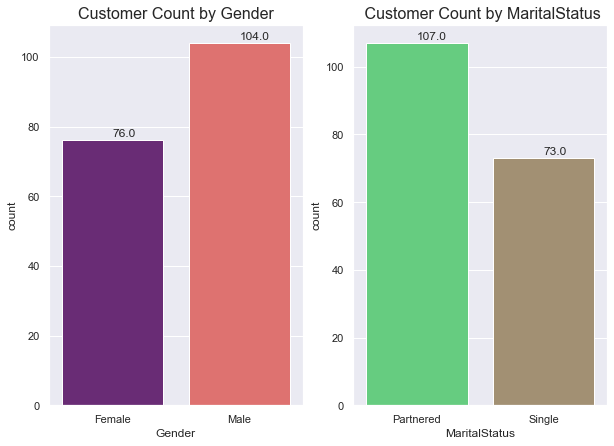

In [17]:
# observation of the categorical variables MaritalStatus and Gender using countplot
fig, ax =plt.subplots(1,2,figsize=(10, 7))#set subplots
sns.countplot(data['Gender'], ax=ax[0],palette='magma');#plotting(subplot1) with the Gender values
sns.countplot(data['MaritalStatus'], ax=ax[1], palette='terrain');#plotting(subplot2) with the MaritalStatus values
ax[0].set_title('Customer Count by Gender',fontsize = 16)#title for the subplot1
for p in ax[0].patches: ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+1), size=12)#printing count on top of bal
ax[1].set_title(' Customer Count by MaritalStatus',fontsize = 16)#title for the subplot2
for p in ax[1].patches: ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+1), size=12)#printing count on top of bal
plt.show()    

#### Observations
From the first plot titled,'Customer Gender Plot',where count plot of customer genders are plotted, we can observe that there are 76 female customers and 104 male customers.<br>
more male customers than female customers by 15%.<br>
From the 2nd plot titled 'Customer Marital Status Count',The customers are more likely to be parternered than single.<br>
There are 107 observations of partnered customers and 73 single customers. The difference in percentage is 19%.

## Numerical attributes/columns analysis

In [18]:
#function to calculate measures of spread the range, interquartile range, and standard deviation.
def spread_distribution(feature):
    median=feature.median()# median values per feature
    minimum=feature.min()#minimum values per feature
    maximum=feature.max()#maximum values per feature
    feature_range= maximum - minimum#range per feature
    skew=feature.skew()#skew per feature
    iqr= feature.quantile(0.75) - feature.quantile(0.25)#IQR per feature
    std= feature.std()#standard deviation per feature
    dict_values={'Range':feature_range,'IQR':iqr,'Skew':round(skew,3),'Standard deviation':round(std,2)}# dictory with all the values
    values=pd.DataFrame.from_dict(dict_values,orient='index',columns=['Values'])#Constructing DataFrame from dict
    return(values.T)#returning the Dataframe

##  What is the age distribution of the customers?
Visualization and observation on - Age - using boxplot

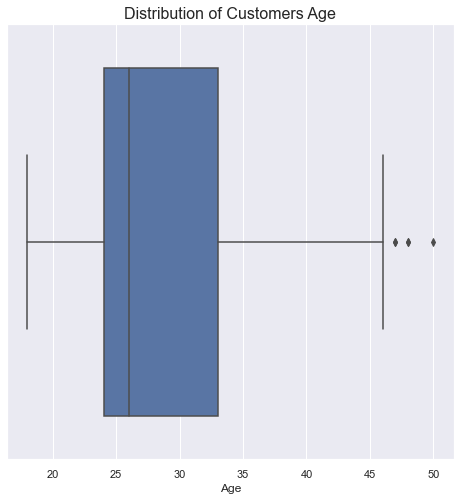

,Range,IQR,Skew,Standard deviation
Values,32.0,9.0,0.982,6.94


In [19]:
#Code for plotting a boxplot on Age
plt.figure(figsize=(8,8))# specifying the size of figure
ax = sns.boxplot(data['Age']);#plot a boxpkot using age column data
ax.set_title('Distribution of Customers Age', fontsize = 16)#setting title
plt.show()#show plot
spread_distribution(data['Age'])#calling the spread_distribution() function

### Observations
 We can observe that customers from 18 years to 50years are using this product, which is great for the store as more customers can be reached with proper analysis.<br>
The median is 26 years but the mean is approximately 29 years.<br>
The highest concentration of customers is in between 24yrs-33yrs and most occurring age is 25 years.<br>
The distribution of data is skewed to the right with a skew value of 0.9821. Also, there are few outliers to the right reaching as far as 50 years.<br>

# What is the income of the customers who are using these products?
Visualization and observations of - Income- using the Histplot and boxplot

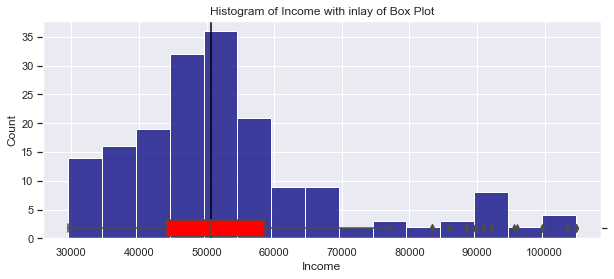

,Range,IQR,Skew,Standard deviation
Values,75019.0,14609.25,1.292,16506.68


In [20]:
plt.figure(figsize=(10, 4))#specifying the size of fiqure
ax = sns.histplot(data['Income'],color = 'navy'); #using the seaborn histplot() function to plot histogram
ax2 = ax.twinx()# code to plot a twin plot 
sns.boxplot(x=data['Income'], ax=ax2,boxprops=dict(facecolor="red"))#boxplot using the seaborn boxplot() function 
ax2.set(ylim=(-.5, 10))#setting the ylimits
ax.set(xlabel = 'Income', ylabel = 'Count', title = 'Histogram of Income with inlay of Box Plot')#setting the labels
ax.axvline(np.median(data['Income']), color='black', linestyle='-')#plots the mediab
plt.show()
spread_distribution(data['Income'])#calling the spread_distribution() function

### Observations
The min value of the income is 29,562 dollars and the max value of the Income is 104581 dollars and the mean salary is 53719.57 dollars.<br>
From the visual observations of the data through the histogram and box plot,we can safely say that most of the observations are in the first 6 classes, ranging from around 30,000 dollars to around 60,000 dollars.<br>
Customers whose income is more than 70,000 dollars is comparatively less. The median Income is 50,595 dollars. <br>
We can also observe that the data is right skewed( a positive value of 1.29).The box plot also shows that there are ouliers in the data to the right.

## How many days a week are the customers planning to use the product?
Visualization and observation of - Usage - using box plot

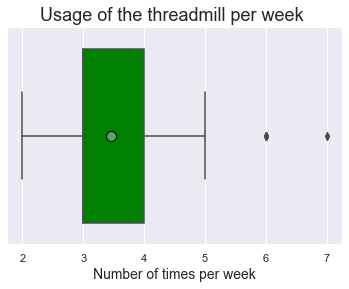

,Range,IQR,Skew,Standard deviation
Values,5.0,1.0,0.739,1.08


In [21]:
# customizing the figure size
plt.figure(figsize=(6, 4))
# make boxplot with Seaborn with mean and customized mean marker values and color
sns.boxplot(x='Usage',data=data,showmeans=True,
            meanprops={"marker":"o","markeredgecolor":"black","markersize":"10"},boxprops=dict(facecolor="green"));
plt.xlabel("Number of times per week", size=14)#xLabel
plt.title("Usage of the threadmill per week ", size=18)#title of the plot
plt.show()#displays the plot
spread_distribution(data['Usage'])#calling the spread_distribution() function

#### Observations
The customers are planning to use the product for 2 times a week to 7 times a week.<br>
Among the 180 observations, median usage per week is 3, showing that 50% of the customers use the threadmill 2 or 3 times per week and remaining 50% of the customers use 4,5,6 or 7 times a week.<br>
The data is right skewed (value of 0.73). There are outliers in the data to the right.

## How many years of education do the customers have?
Visualization and observation of - Education -using distplot and boxplot

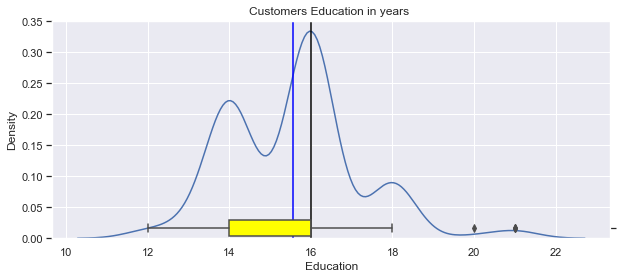

,Range,IQR,Skew,Standard deviation
Values,9.0,2.0,0.622,1.62


In [22]:
#plotting a distplot for Education with mean and median
plt.figure(figsize=(10, 4))#figure size
ax = sns.distplot(data['Education'],hist= False) ; # plotting a distribution of education using the seaborn distplot() function 
ax2 = ax.twinx()#to create a twin Axes sharing the x-axis
sns.boxplot(x=data['Education'], ax=ax2,boxprops=dict(facecolor="yellow"));# creating a boxplot using the seaborn boxplot() function 
ax2.set(ylim=(-.5, 10))#setting y limits
ax.set(xlabel = 'Education', ylabel = 'Density', title = 'Customers Education in years ')#adding labels
ax.axvline(np.median(data['Education']), color='black', linestyle='-')#plots the median
ax.axvline(np.mean(data['Education']), color='blue', linestyle='-')#plots the mean
plt.show()
spread_distribution(data['Education'])#calling the spread_distribution() function

#### Observations
The number of years in education for the customers is ranging from 12 - 21 years.<br>
The average years of education of the customers is around 15yrs.<br>
Also,The median years of education is 16yrs,implying 50% of the customers are having education below 16years and 50% have education above 16yrs. <br>
The values of education are right skewed with a value of 0.622.There are outliers to the right.
It will be interesting to find how the education impacts the Product choice.

##  How many miles are the customers planning to run per week?
Visualization and observation of - Miles- using histplot and boxplot

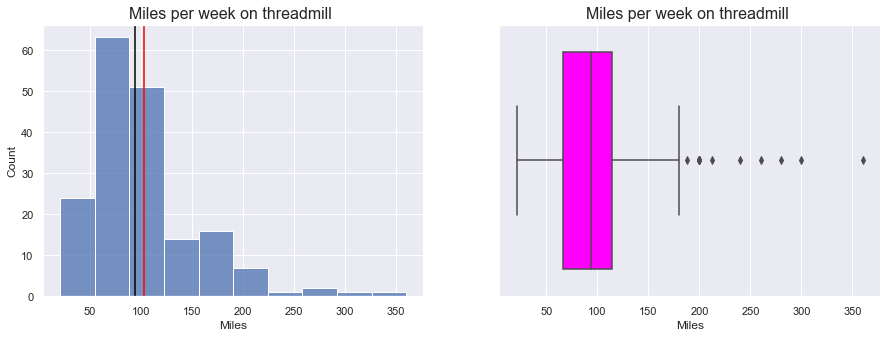

,Range,IQR,Skew,Standard deviation
Values,339.0,48.75,1.724,51.86


In [23]:
fig, ax =plt.subplots(1,2,figsize=(15, 5))# determing the size of figure and number of subplots
sns.histplot(data['Miles'], ax=ax[0], bins=10);#hisplot for the Miles attribute
sns.boxplot(data['Miles'], ax=ax[1],boxprops=dict(facecolor="magenta"));# boxplot for miles with custom color
ax[0].set_title('Miles per week on threadmill ',fontsize=16)
ax[1].set_title('Miles per week on threadmill ',fontsize=16)
ax[0].axvline(np.median(data['Miles']), color='black', linestyle='-')#plots the median
ax[0].axvline(np.mean(data['Miles']), color='red', linestyle='-')#plots the median
plt.show()
spread_distribution(data['Miles'])#calling the spread_distribution() function

#### Observations
The estimation for miles per week is ranging from minimum of 21 miles per week to maximum of 360 miles per week, with the median value of 94 miles per week. 
The mean value for the miles is 103.14 miles.
The mean and median are close, indicating that most people are in lower range of miles.
The data is skewed to the right with a value of 1.724 
There are many outliers to right.

##  What are the customers fitness ratings?
Visualization and observation of - Fitness -using  histogram and kde of distplot

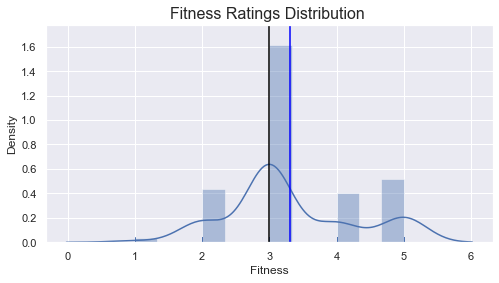

,Range,IQR,Skew,Standard deviation
Values,4.0,1.0,0.455,0.96


In [24]:
plt.figure(figsize=(8, 4))#size of figure
ax=sns.distplot(data['Fitness'],rug= True)#histogram, kde plot along with rug plot
ax.axvline(np.median(data['Fitness']), color='black', linestyle='-')#plots the median
ax.axvline(np.mean(data['Fitness']), color='blue', linestyle='-')#plots the mean
ax.set_title('Fitness Ratings Distribution ',fontsize=16)#setting the title
plt.show()
spread_distribution(data['Fitness'])#calling the spread_distribution() function

#### Observations
The self ratings of the customers fitness range from 1 to 5. 1 being-very unfit and 5 being-very fit.<br>
From the spread of the Fitness distribution,We can visually see that the third bin has most number of observations.Most number of customers are rating themselves as 3.<br>
The Median value of the Fitness is 3, indicating 50% of the customers have fitness level below than 3 and 50% above 3 rating.
The fitness data is skewed to the right as media < mean value.<br>
It is insightful if we can get the type of product the customers choose depending on their fitness, if indeed they are related.
There are 2  customers with low fitness level 1, most is level 3 with 97 customers. Levels 2 and 4  are having almost similar count of customers with 26 and 24 respectively.There are 31 customers with fitness level 5.

# Bivariate Analysis
Comparing 2 variables

## Pairplot

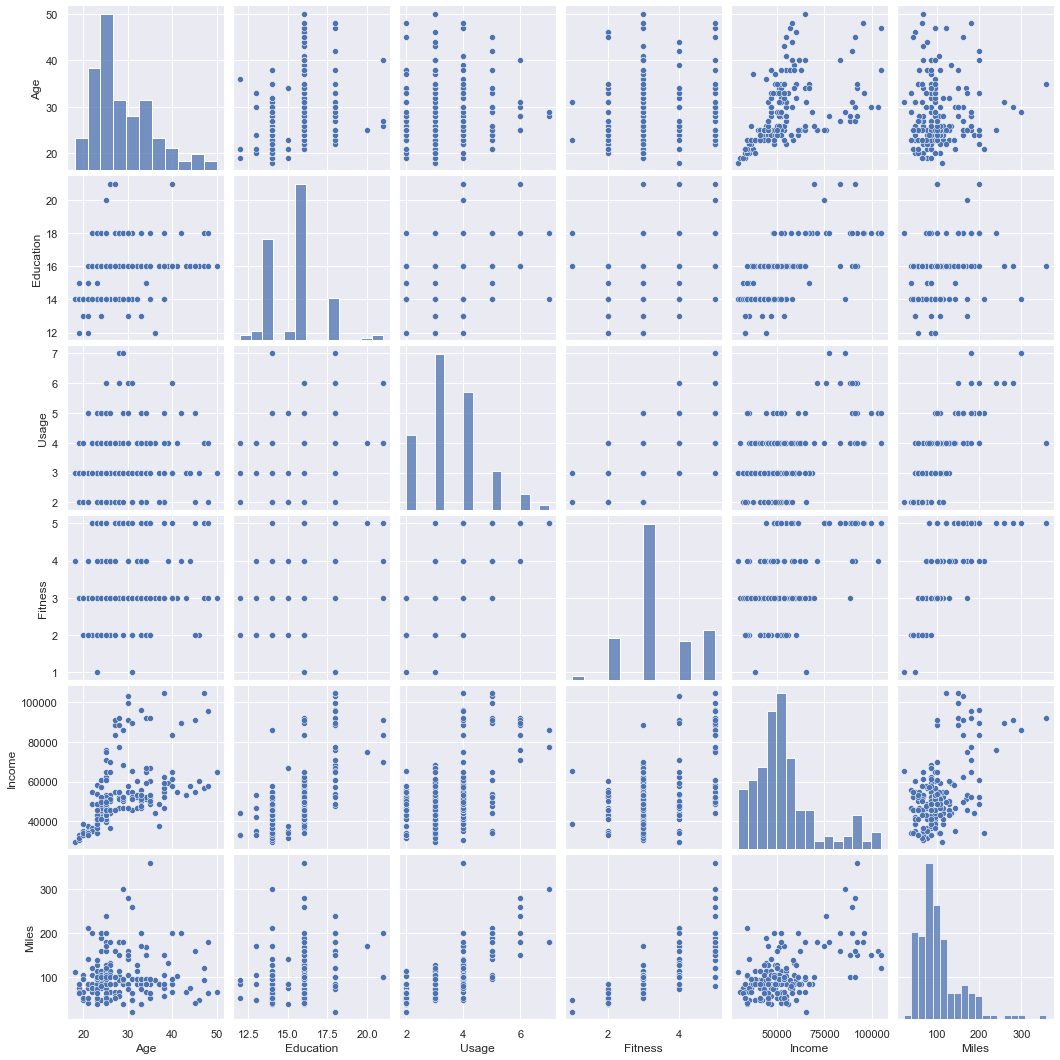

In [25]:
sns.pairplot(data );# plots pairwise relationships between pairs of the variables of the DataFrame,by default numerical values are taken

#### Observations
As Fitness increases,Miles are increasing.<br>
The education and income are also correlated.<br>
In order to get better idea on strength on the correlation, a heatmap can be used.

## Heatmap

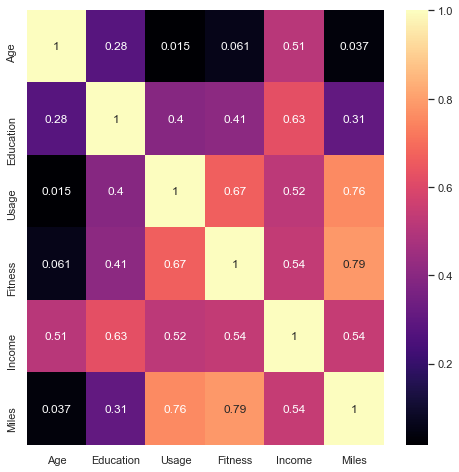

In [26]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,cmap='magma');#generates a heatmap with the correalation values

#### Observations

1. When observing the correlation, it is important to remember correlation does not imply causation.
2. The highest correlation is between Fitness and Miles.
3. There is also higher correlation between Usage and Fitness and Usage and Miles.
4. There is a correlation seen between Income and Fitness and Income and miles, it is moderate value.
5. There are no negative correlation among the attributes.
6. There is very weak correlation between Age and Usage and also, Fitness and Age.


# Let us see the customer profile for different products.
Products VS the other attributes of the data set

## Does gender have an influence on the product choice?What is the preferred choice?
 Product choice across Gender

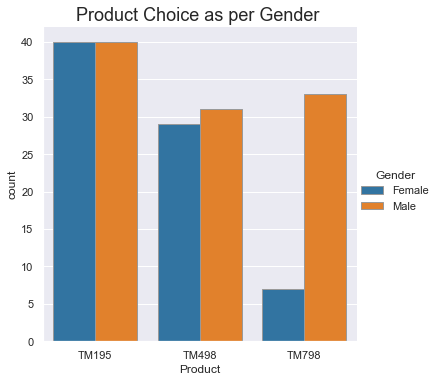

In [27]:

sns.catplot(x="Product", hue="Gender", kind="count",palette="tab10", edgecolor=".6",data= data);#Count plot for Products based on gender
plt.title("Product Choice as per Gender ", size=18)#title of the plot
plt.show()#show plot
#print('Over all percentage split of Products based on gender\n',round(data.groupby(by=['Product','Gender'])['Miles'].count()/(data.groupby(by=['Product','Gender'])['Miles'].count().sum())*100),3)# a count for each product based on gender

#### Observations
Gender preference are as follows:
For TM195 the gender splits almost even, with 40 males and 40 female customers.<br>
The product TM498 is also split almost even as 31 males and 29 females preferred them.<br>
But, for the product TM798, it is mostly preferred ny males.The males count comes to 33 and females only 7.
Also,most preferred product by males is TM195 and least preffered is TM498.
Most preferred product by females is also TM195 and least chosen product is TM798.


## How does the marital status influence the product choice?
Product choice across Marital Status

In [28]:
#function to find ratio
def ratio(Model,Status):
    for j in range(0,1) :
        for i in range(0,len(Status),2):
             # dividing the count of partnerd with singles to get ratio
                print("Marital Status ratio[partnered:single] for product {} is {} :1".format(Model.unique()[j], round(Status[i]/Status[i+1],2)))
                j=j+1

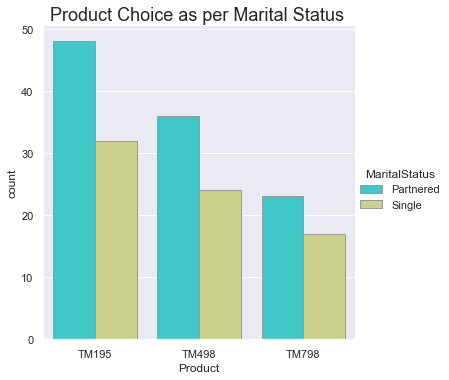

Marital Status ratio[partnered:single] for product TM195 is 1.5 :1
Marital Status ratio[partnered:single] for product TM498 is 1.5 :1
Marital Status ratio[partnered:single] for product TM798 is 1.35 :1


In [29]:
#categorical plot with kind as count
g=sns.catplot(x="Product", hue="MaritalStatus", kind="count", edgecolor=".6",palette ='rainbow',data= data);
plt.title("Product Choice as per Marital Status ", size=18)#title of the plot
plt.show()
statusvalues = data.groupby(by=['Product','MaritalStatus'])['MaritalStatus'].count()#placing the count in a variable 
ratio(data.Product,statusvalues)#calling the ration function above

#### Observations

The customers of the products are most likely to be partnered than single.<br>
For all the products TM195, TM498 and TM798 there are more partnered customers than the single customers.<br>
It is interesting to note that between the partnered customers and single customers their preference ratios between the products are almost same.<br>
Most purchased product by partnered customers is TM195 and TM798 had least sales, same choices are made by single customers also.

## Does  income have any influence on the product choice?
Product and different incomes

In [30]:
#funtion to display the minimum value , maximum value and the median value of the numerical feature
def details(feature): #defining a function
    median=feature.groupby(data['Product']).median()#Series with median values ,per product
    minimum=feature.groupby(data['Product']).min()#Series with minimum values ,per product
    maximum=feature.groupby(data['Product']).max()#Series with maximum values,per product
    skew=feature.groupby(data['Product']).skew()# skew values 
    feature_details= pd.merge(minimum,maximum ,right_index = True,left_index = True) #merging the minimum and maximum to make feature_details DataFrame
    feature_details=pd.merge(feature_details,median,right_index=True,left_index=True)# merging the Median to the feature_details
    feature_details=pd.merge(feature_details,skew,right_index=True,left_index=True)
    feature_details.columns = ['Minimum','Maximum','Median','Skew' ]#Renaming the columns
    return(feature_details)

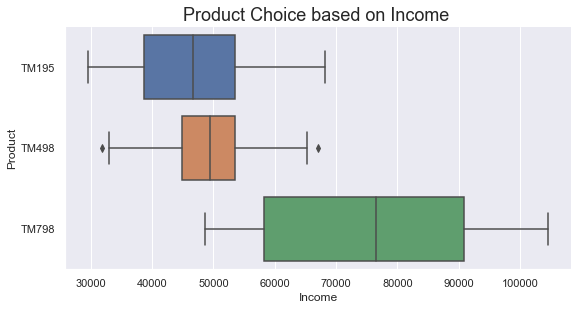

,Minimum,Maximum,Median,Skew
Product,,,,
TM195,29562,68220,46617.0,0.176621
TM498,31836,67083,49459.5,-0.010550
TM798,48556,104581,76568.5,-0.079646


In [31]:
#box plot for income and Product
#categorical plot with kind as box,height and aspect tells the size of plot
sns.catplot(x="Income", y='Product', kind="box",  data=data,  height=4, aspect=2)
plt.title("Product Choice based on Income ", size=18)#title of the plot
plt.show()
details(data['Income'])#calling the function details()

#### Observations

There is difference in threadmill product choices as the income increases.<br>
TM195 is preferred by customers who are in the Income range 29,562 dollars - 68,220 dollars. The median income is 46,617dollars.Also the data is skewed to the right with a skew value approx of 0.18.T<br>

TM498 is preferred by customers who are Income range 31,836 dollars to 67,083 dollars and the median income is 49,459.50 dollars.There are few outliers to the right and left. Data is little skewed to the left, with a skew value of -0.010 <br>

But, among the customers with high Income, as per the visual observations, the choice is TM798.The salary ranges are from 48,556 dollars to 104,581 dollars. The median income is 76,568.50 dollars.The data is slightly skewed to the left, with a skew value of -0.079. <br>
Are the choices made because of affordability or because of other factors should be further investigated.<br>

## Does  education(in years) impact choice of product?
Product choice with income

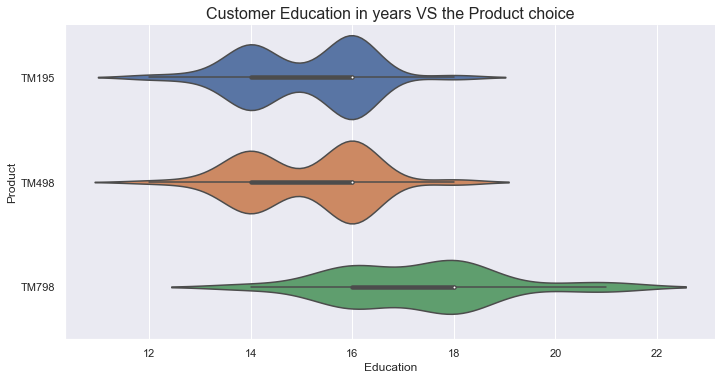

,Minimum,Maximum,Median,Skew
Product,,,,
TM195,12,18,16,-0.203094
TM498,12,18,16,-0.114757
TM798,14,21,18,0.401303


In [32]:
#catplot for Education vs Product of kind= boxplot
sns.catplot(x="Education", y='Product', kind="violin",  data=data, height=5, aspect=2);#
plt.title('Customer Education in years VS the Product choice',fontsize=16)#title for plot
plt.show()
details(data['Education'])#calling the details()function

#### Observations
For the product TM195, the minimum education is of 12years and maximum education is of 18years with a median education of 16years.<br>
For the product TM498, the minimum education is of 12years and maximum education is of 18years with a median education of 16yrs.<br>
For the product TM798, the minimum education is 14years and maximum education is of 21years with a median education of 18 years.<br>
From the visualization it seems, customers with higher education are preferring the product TM798. <br>
The customers education level is almost similar for the products TM195 and TM498.<br>
From the box plot, we can observe that the data has no outliers. <br>
For the TM195  the data is skewed to the left, with skew value of ~: -0.203<br>
For the TM498  the data is skewed to the left too, with a skew value of ~: -0.114<br>
For the TM798  the data is skewed to the right witha a skew value of ~: 0.401<br>

## How are product choices differing based on usage per week?
Product choice by usage


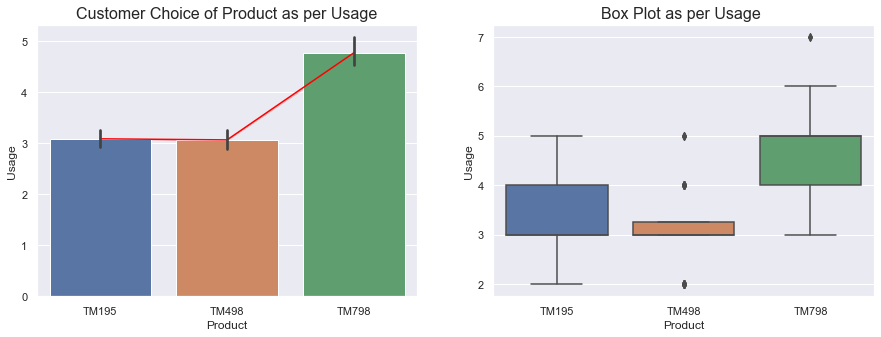

,Minimum,Maximum,Median,Skew
Product,,,,
TM195,2,5,3,0.169130
TM498,2,5,3,0.494874
TM798,3,7,5,0.669434


In [33]:
fig, ax =plt.subplots(1,2,figsize=(15, 5))# determing the size of figure and number of subplots
sns.lineplot(x="Product", y="Usage",ci=0,data=data,color="RED",ax=ax[0])#lineplot for the Products and Usage
sns.barplot(x="Product", y="Usage",data=data, ax=ax[0])#barplot
sns.boxplot(x="Product", y='Usage', data=data, ax=ax[1]);
ax[0].set_title('Customer Choice of Product as per Usage',fontsize=16)#title specifications for 1st plot
ax[1].set_title('Box Plot as per Usage ',fontsize=16)#title specifications for 2nd plot
plt.show()
details(data['Usage'])#calling the details() function

#### Observation
As the customer Usage per week is increasing,there is a difference in product choice.<br>
If the median usage per week is higher than 3,they are choosing TM798.TM798 customer's median usage is 5 times a week. 
Customers with low usage are selecting the products, TM195 and TM498 and their median usage is 3 times a week.
For the TM195 the data is skewed to the right, with skew value of: 0.169<br>
For the TM498 the data is skewed to the right too, with a skew value of:0.498 br>
For the TM798 the data is skewed to the right witha a skew value of: 0.669<br>

We have to do more reseach on why the product TM798 is a clear winner with high Usage.

## What is the product  choice of customers according to their miles per week use?
Product choice by miles per week

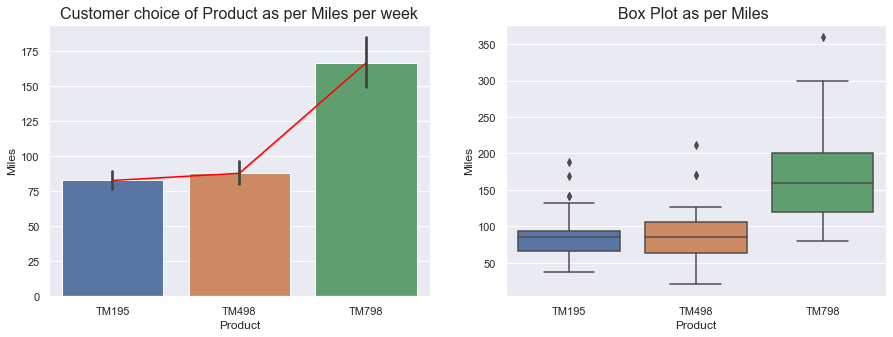

,Minimum,Maximum,Median,Skew
Product,,,,
TM195,38,188,85,1.008913
TM498,21,212,85,1.090065
TM798,80,360,160,1.134033


In [34]:
fig, ax =plt.subplots(1,2,figsize=(15, 5))# determing the size of figure and number of subplots
sns.lineplot(x="Product", y="Miles",ci=0,data=data,color="RED",ax=ax[0])#lineplot for the Products and Usage
sns.barplot(x="Product", y="Miles",data=data, ax=ax[0])#barplot of same values
sns.boxplot(x="Product", y='Miles', data=data, ax=ax[1]);#boxplot
ax[0].set_title('Customer choice of Product as per Miles per week',fontsize=16)#title specifications for 1st plot
ax[1].set_title('Box Plot as per Miles ',fontsize=16)#title specifications for 2nd plot
plt.show()
details(data['Miles'])#calling details() functions

#### Observations
Customers who want to run more miles per week selected the product TM798.The miles are ranging from 80(min)-360(max) per week.The median value is 160 miles.<br>
The lowest milage customers are choosing the product TM195.Their range of miles is from 38-188 miles per week,median miles is 85 miles per week.<br>
The customers who choose product TM498 have miles ranging from 21miles-212 miles per week.Median of 85 miles per week.<br>
All of the 3 products have a right skew to their data.

## How is age affecting the product choice?
Product choice by age

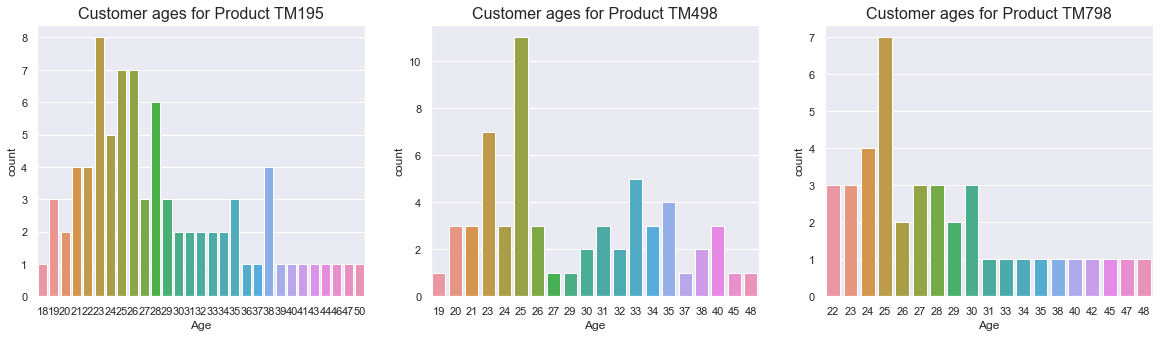

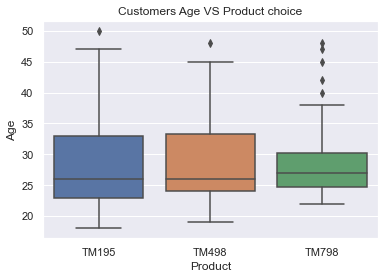

,Minimum,Maximum,Median,Skew
Product,,,,
TM195,18,50,26,0.978828
TM498,19,48,26,0.713156
TM798,22,48,27,1.448467


In [35]:
fig, ax =plt.subplots(1,3,figsize=(20, 5))# determing the size of figure and number of subplots
sns.countplot(data[data['Product'] == 'TM195']['Age'], ax=ax[0], );#countplot for the Age for Product TM195
sns.countplot(data[data['Product'] == 'TM498']['Age'], ax=ax[1]);#;#countplot for the Age for Product TM498
sns.countplot(data[data['Product'] == 'TM798']['Age'], ax=ax[2])#;#countplot for the Age for Product TM798
ax[0].set_title('Customer ages for Product TM195',fontsize=16)
ax[1].set_title('Customer ages for Product TM498',fontsize=16)
ax[2].set_title('Customer ages for Product TM798', fontsize=16)
plt.show()
sns.boxplot(x="Product", y="Age",data=data);# box plot for all the products.age feature,in one plot,to compare
plt.title('Customers Age VS Product choice')#title
plt.show()
details(data['Age'])#calling details() functions

#### Observations

The customer ages range from 20 years to 50 years.<br>
TM195 product has customer ages ranging from 18 years to 50 years. The mean age approximately is 29 years and median age is 26 years.<br>
TM498 product has customer ages are ranging from 19 years to 48 years. The mean age approximately is 29 years and median age is 26 years .<br>
The age range is almost similar for the products TM195 and TM498.<br>
For the Product TM798,the age ranges from 22 years to 48 years. There are outliers towards the higher age, but mostly 50% of customer's age is concentrated in the range of 25yrs - 30yrs.The mean age approximately is 29 years and median age is 27 years.TM798 has many outliers to the upper bounds of values.
Age Data for all the products is skewed to right.

## What is the influence of fitness levels on the product choice?
Product choice with fitness levels

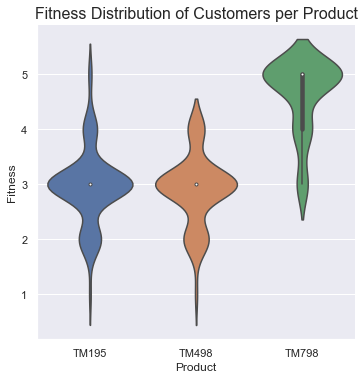

,Minimum,Maximum,Median,Skew
Product,,,,
TM195,1,5,3,0.306534
TM498,1,4,3,-0.345375
TM798,3,5,5,-1.574217


In [36]:
#countplot for the Product for fitness
sns.catplot(x="Product", y="Fitness",  data=data, kind='violin')
plt.title('Fitness Distribution of Customers per Product', fontsize=16)#title for plot
plt.show()
details(data['Fitness'])#calling details() functions

#### Observations
Among the highest fit customers,the clear product choice is TM798 as we can see high distribution of TM798 at fitness level 5. <br>
For products TM498 and TM195, more customers are of fitness levels 2 and 3, some outliers are observed to the left and right of the data.<br>
For the product TM798, no customers below the fitness levels 3 are observed.<br>
Product TM498 has no customers of fitness 5.<br>
Fitness data for TM195 is right skewed with value 0.306534<br>
Fitness data for TM498 is left skewed, value is -0.345375<br>
Fitness data of TM798 is skewed to left, value is -1.574217<br>

# MultiVariate Analysis
Comparing more than 2 variables.

## When education and miles are considered along with fitness, which product is more desirable?

Text(0.5, 1.0, 'Multivariate analysis for product choice with Educattion,Miles and Fitness')

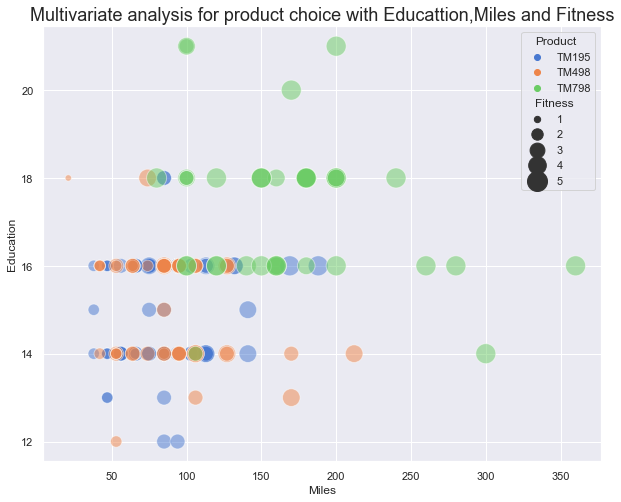

In [37]:
plt.figure(figsize=(10,8))# specifying the size of figure
#scatterplot with 4 variables
ax=sns.scatterplot(x="Miles", y='Education', hue='Product', data=data,sizes=(40, 400), 
                   alpha=.5, palette="muted",size='Fitness',  x_jitter=True,y_jitter=True);
ax.set_title('Multivariate analysis for product choice with Educattion,Miles and Fitness', fontsize=18)#title

#### Observations
In regard to the product choice, customers with high education are choosing the product TM798, also shows that those customers are of high fitness, indicated by the size(large) of green markers. <br>
We can also observe that the spread of blue and orange markers is to lower end of plot, indicating low miles and low education years for the TM195 and TM498<br>
Products TM195 and TM498 are distributed almost similarly at the lower end of the values.<br>
Also, lot of large blue or orange markers are not visible, indicating may be there are not many high fit customers for TM498 and TM195.


## What is the product choice among the fitness enthusiasts with respect to their gender?

<Figure size 576x720 with 0 Axes>

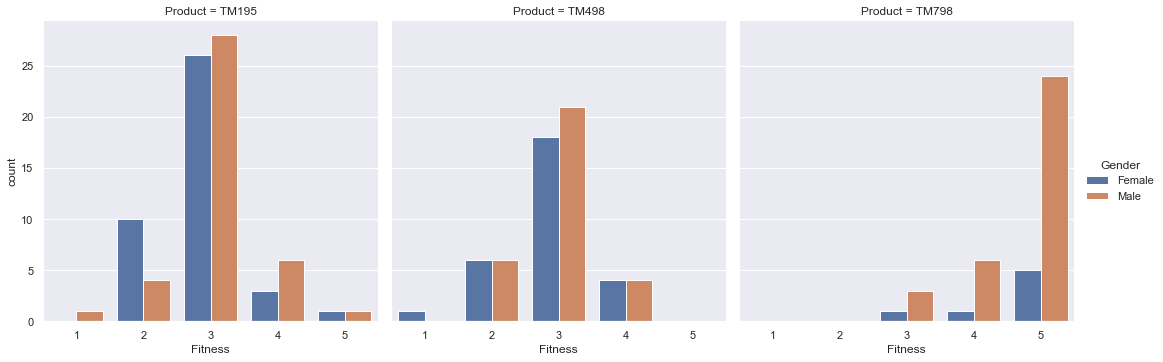

In [38]:
plt.figure(figsize=(8,10))# specifying the size of figure
ax=sns.catplot(x='Fitness', hue='Gender', col='Product' , data= data, kind = 'count');#catplot of kind countplot.
plt.show()

 #### Observations

The most of the customers of both genders are selecting the products TM195 and TM498 when their fitness levels are lower than 3.
The customers with high fitness(5) are choosing both products TM195 and TM798, this is observed in both the genders.
The customers who use the product TM498 does not have highest fitness(5)in either of the genders.
Customers who are in the lower fitness levels are not choosing TM798. This is true for both the genders.
Product TM195 is the only product that has customers from all the fitness levels.
There is a peculiar observation that, female customers of lowest finess level(1) are preferring TM498 while male customers are preferring TM195.<br>
There are 76 females and 104 males, ages ranging from 19-50 and 18 to 48 respectively. Among them there are two customers with finess level 1, and 26 customes with fitness level 2.Also 97 customers with fitness level 3, and 24 customers with fitness level 4 and also 31 customers with fitness level 5.

## Heatmaps per product


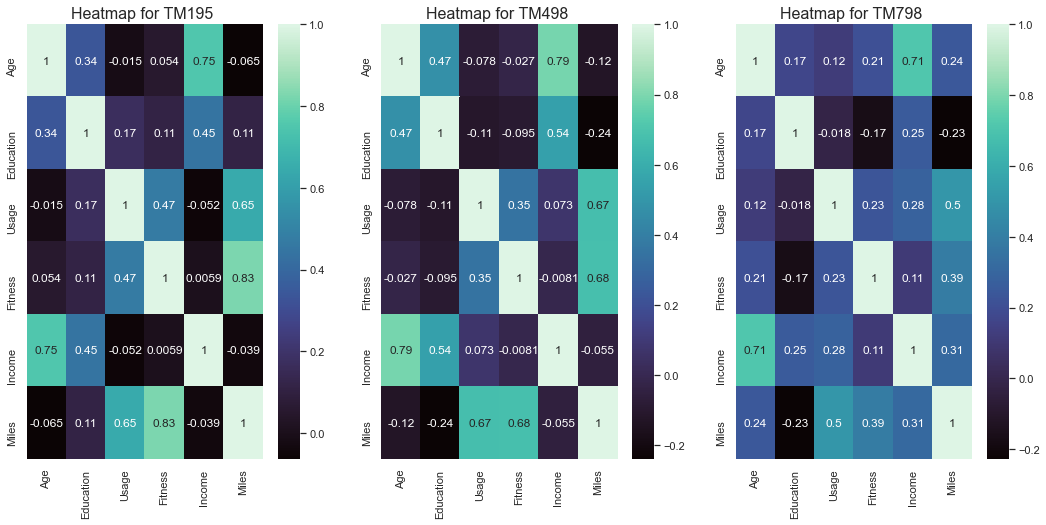

In [48]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(18,8))
sns.heatmap(data[data['Product']=='TM195'].corr(),annot=True, ax=ax1,cmap='mako');
sns.heatmap(data[data['Product']=='TM498'].corr(),annot=True, ax=ax2, cmap='mako');
sns.heatmap(data[data['Product']=='TM798'].corr(),annot=True, ax=ax3,cmap='mako');
ax1.set_title('Heatmap for TM195 ',fontsize=16);
ax2.set_title('Heatmap for TM498 ',fontsize=16);
ax3.set_title('Heatmap for TM798 ',fontsize=16);

#sns.heatmap(data[data['Product']=='TM195'].corr(),annot=False,cmap='magma');#generates a heatmap with the correalation values

#### Observations
The correlation between the same attributes have different values ,for different products./<br>
For TM195 the correlation between miles and fitness is the highest. But for other products,the same relation is not seen that strong.<br>
For product TM498, age and income has the highest correlation.Higher value than the other products.<br>
For product TM798, age and oncome have the highest correlation.
For product TM195, there are 5 negative correlation values between the attributes.<br>
For product TM798, there are 7 negative correlation values between the attributes.<br>
There are 8 negative correlation values for the product TM798 attributes.
For Product TM798, age has low positive correlation with miles, fitness and education but it is not seen in other products.

## Further Analysis

We can dig deeper to explore the variation and outliers and remove or impute them if necessary, depending on the algoritham that is selected to build models.<br>
For this data set as we have only 180 observations, imputing more data may not be advisable.<br>
Normalization-To do that we can use Standard scalar or MinMax scalar.
We can further transform the data, in particular in this dataset, we can use log_tranformation on income attribute to pull back the values.